In [30]:
import numpy as np
import pandas as pd
import os
import pickle
import matplotlib
import matplotlib.pyplot as plt

np.random.seed(42)

In [3]:
dataset = pd.read_csv("trends.csv")

In [4]:
dataset.head()

,location,year,category,rank,query
0,Global,2001,Consumer Brands,1,Nokia
1,Global,2001,Consumer Brands,2,Sony
2,Global,2001,Consumer Brands,3,BMW
3,Global,2001,Consumer Brands,4,Palm
4,Global,2001,Consumer Brands,5,Adobe


In [6]:
dataset.index

RangeIndex(start=0, stop=26955, step=1)

In [7]:
len(dataset) #longitud

26955

In [8]:
dataset.shape #filas y columnas

(26955, 5)

In [9]:
dataset.info() #columnas y tipos de datos

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26955 entries, 0 to 26954
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   location  26955 non-null  object
 1   year      26955 non-null  int64 
 2   category  26955 non-null  object
 3   rank      26955 non-null  int64 
 4   query     26955 non-null  object
dtypes: int64(2), object(3)
memory usage: 1.0+ MB


In [10]:
dataset.describe() #solo describe las numéricas

,year,rank
count,26955.000000,26955.00000
mean,2015.243369,3.00000
std,3.564683,1.41424
min,2001.000000,1.00000
25%,2013.000000,2.00000
50%,2016.000000,3.00000
75%,2018.000000,4.00000
max,2020.000000,5.00000


In [12]:
dataset.describe(include=np.object) #describe las columnas con datos Object

,location,category,query
count,26955,26955,26955
unique,83,2450,18431
top,United States,People,Paul Walker
freq,2070,760,84


In [14]:
#Explorar el dataset
dataset["category"].value_counts()

People                     760
Searches                   620
Movies                     330
TV Shows                   305
Películas                  250
                          ... 
Couturiers et designers      5
... during coronavirus       5
Koronavírus-járvány          5
Detroit, MI                  5
Wat betekent...?             5
Name: category, Length: 2450, dtype: int64

In [15]:
dataset["query"].value_counts()

Paul Walker                     84
Donald Trump                    83
Facebook                        62
Robin Williams                  61
Whitney Houston                 56
                                ..
Fire Fight Australia concert     1
Tiramisu recept                  1
美國網球公開賽                          1
Marbella                         1
Подорожали яйца                  1
Name: query, Length: 18431, dtype: int64

In [18]:
#Mostrar duplicados
dataset[dataset.duplicated(keep="first")] #todos los registros duplicados salvo la primera ocurrencia son marcados como True

,location,year,category,rank,query
20000,Kazakhstan,2018,Жылдың фильмі/Фильм года,1,Веном
20001,Kazakhstan,2018,Жылдың фильмі/Фильм года,2,Мстители: Война бесконечности
20002,Kazakhstan,2018,Жылдың фильмі/Фильм года,3,Бизнес по-казахски в Америке
20003,Kazakhstan,2018,Жылдың фильмі/Фильм года,4,Монстры на каникулах 3
20004,Kazakhstan,2018,Жылдың фильмі/Фильм года,5,Дэдпул 2
25400,Kenya,2020,Trending How To (Tech),1,How to fill Tpad online
25401,Kenya,2020,Trending How To (Tech),2,How to create a website
25402,Kenya,2020,Trending How To (Tech),3,How to connect a phone to TV
25403,Kenya,2020,Trending How To (Tech),4,How to make my electric plate cooker work
25404,Kenya,2020,Trending How To (Tech),5,How to take a screenshot on a laptop


In [19]:
#Eliminamos los registros duplicados
dataset.drop_duplicates(inplace=True)

In [20]:
len(dataset) #se eliminan los 10 duplicados encontrados menos el primer duplicado de cada uno de ellos

26945

In [21]:
#reiniciamos el índice
dataset.reset_index(drop=True, inplace=True)

In [27]:
#Guardamos el dataset limpio de duplicados
dataset.to_pickle("trends_clean.pkl")

In [28]:
#trabajaremos con el dataset trends_clean
df=pd.read_pickle("trends_clean.pkl")

In [29]:
df.head()

,location,year,category,rank,query
0,Global,2001,Consumer Brands,1,Nokia
1,Global,2001,Consumer Brands,2,Sony
2,Global,2001,Consumer Brands,3,BMW
3,Global,2001,Consumer Brands,4,Palm
4,Global,2001,Consumer Brands,5,Adobe


array([[<AxesSubplot:title={'center':'year'}>,
        <AxesSubplot:title={'center':'rank'}>]], dtype=object)

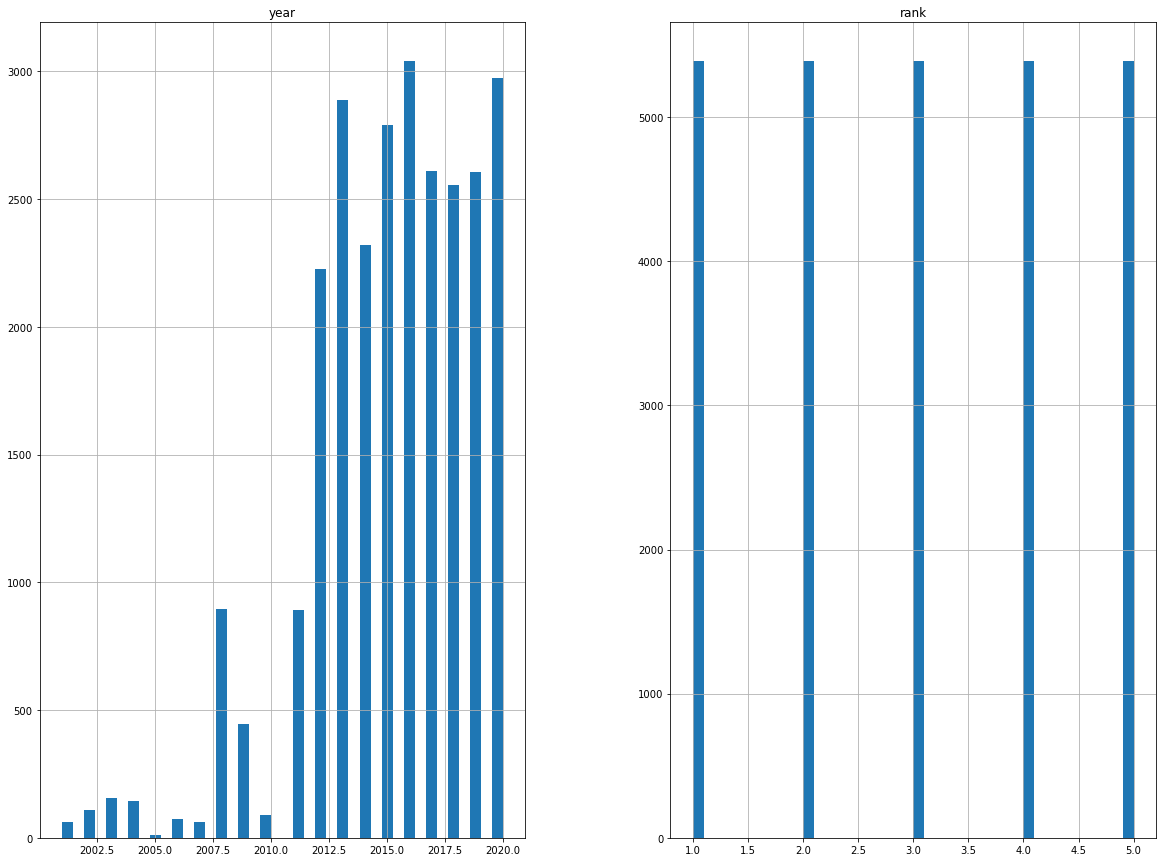

In [34]:
#Crear histogramas para las variables numericas
df.hist(bins=40, figsize=(20,15))

United States         2070
Global                1135
Japan                  765
Canada                 690
Brazil                 675
                      ... 
Dominican Republic       5
Kuwait                   5
Sudan                    5
El Salvador              5
Honduras                 5
Name: location, Length: 83, dtype: int64


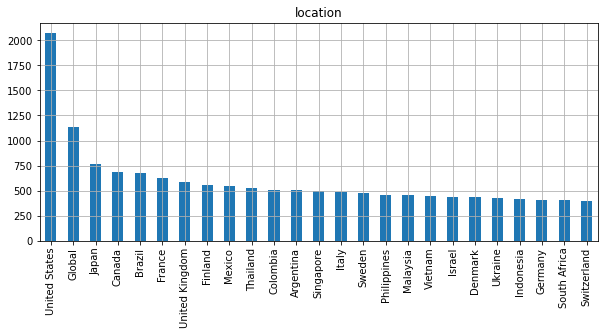

Paul Walker                     84
Donald Trump                    83
Facebook                        62
Robin Williams                  61
Whitney Houston                 56
                                ..
ミュシャ展                            1
Fire Fight Australia concert     1
Tiramisu recept                  1
美國網球公開賽                          1
Подорожали яйца                  1
Name: query, Length: 18431, dtype: int64


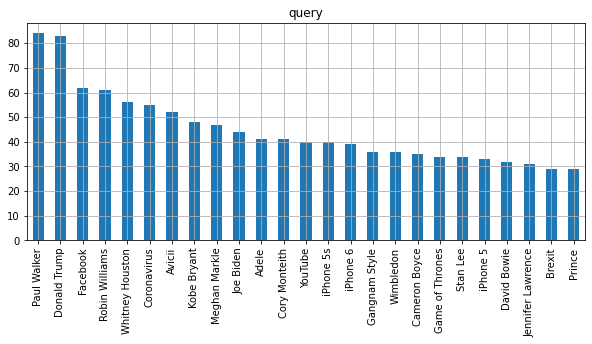

People                     760
Searches                   620
Movies                     330
TV Shows                   305
Películas                  250
                          ... 
Couturiers et designers      5
... during coronavirus       5
Koronavírus-járvány          5
Detroit, MI                  5
Wat betekent...?             5
Name: category, Length: 2450, dtype: int64


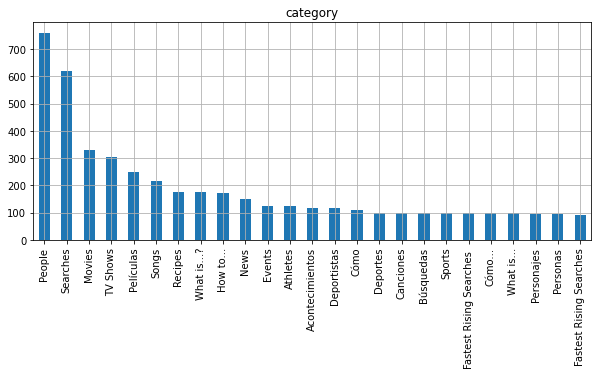

In [38]:
#Histogramas para el top de las variables categoricas
features_cat = ["location", "query", "category"]

for f in features_cat:
    print(df[f].value_counts())
    #Histograma top 25
    plt.figure(figsize=(10,4))
    df[f].value_counts()[0:25].plot(kind="bar")
    plt.title(f)
    plt.grid()
    plt.show()

In [39]:
#filtrar las queries en españa en el año 2020
print(df.location.unique().tolist())

['Global', 'France', 'Germany', 'United Kingdom', 'Australia', 'Canada', 'Italy', 'Netherlands', 'Spain', 'United States', 'Argentina', 'Austria', 'Belgium', 'Brazil', 'Chile', 'China', 'Colombia', 'Czechia', 'Denmark', 'Finland', 'Hong Kong', 'India', 'Malaysia', 'Mexico', 'New Zealand', 'Philippines', 'Poland', 'Russia', 'Singapore', 'South Africa', 'South Korea', 'Sweden', 'Switzerland', 'Taiwan', 'Thailand', 'United Arab Emirates', 'Costa Rica', 'Croatia', 'Dominican Republic', 'Ecuador', 'El Salvador', 'Guatemala', 'Honduras', 'Japan', 'Kenya', 'Nigeria', 'Panama', 'Peru', 'Egypt', 'Hungary', 'Ireland', 'Israel', 'Norway', 'Portugal', 'Romania', 'Saudi Arabia', 'Serbia', 'Slovakia', 'Turkey', 'Ukraine', 'Ghana', 'Indonesia', 'Senegal', 'Uganda', 'Vietnam', 'Bangladesh', 'Bulgaria', 'Estonia', 'Latvia', 'Lithuania', 'Pakistan', 'Puerto Rico', 'Slovenia', 'Uruguay', 'Venezuela', 'Greece', 'Belarus', 'Kazakhstan', 'Sri Lanka', 'Zimbabwe', 'Myanmar (Burma)', 'Kuwait', 'Sudan']


In [46]:
df[(df["location"]=="Spain") & (df["year"]>2019)]

,location,year,category,rank,query
26265,Spain,2020,General,1,coronavirus
26266,Spain,2020,General,2,elecciones eeuu
26267,Spain,2020,General,3,classroom
26268,Spain,2020,General,4,la liga
26269,Spain,2020,General,5,Kobe Bryant
26270,Spain,2020,Recetas,1,pan casero
26271,Spain,2020,Recetas,2,masa madre
26272,Spain,2020,Recetas,3,churros
26273,Spain,2020,Recetas,4,levadura fresca
26274,Spain,2020,Recetas,5,donuts caseros


In [58]:
#mas buscado en el mundo en 2020
df_filter2 = df[(df["year"]>2019) & (df["rank"]>1)]

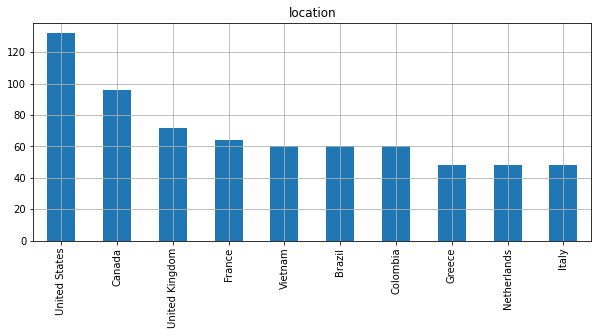

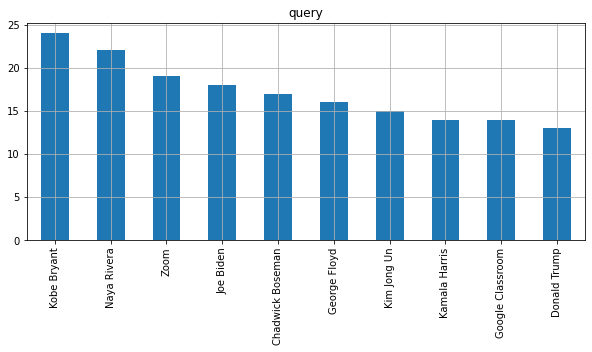

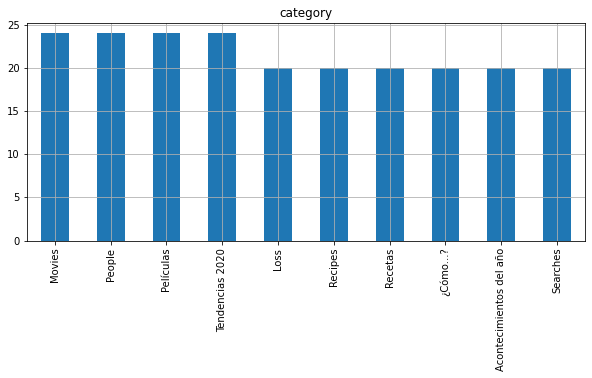

In [61]:
features_filter = ["location", "query", "category"]

for f in features_filter:
    #print(df_filter[f].value_counts())
    #Histograma top 25
    plt.figure(figsize=(10,4))
    df_filter[f].value_counts()[0:10].plot(kind="bar")
    plt.title(f)
    plt.grid()
    plt.show()

Dataset obtenido gracias a: 
Dhruvil Dave, “Google Trends Dataset.” Kaggle, 2021, doi: 10.34740/KAGGLE/DSV/1936665.